# Regularized Linear Models

A good way to reduce overfitting is to regularize the
model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be
for it to overfit the data. For a linear model, regularization is typically achieved by constraining the weights of
the model.

## Ridge Regression


Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to α∑θ^2 from i=1to n is added to the cost function. 

Note that the regularization term should only be added
to the cost function during training. Once the model is trained, you want to evaluate
the model’s performance using the unregularized performance measure.

The hyperparameter α controls how much you want to regularize the model. If α = 0
then Ridge Regression is just Linear Regression. If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean. 

It is important to scale the data (e.g., using a StandardScaler)
before performing Ridge Regression, as it is sensitive to the scale of
the input features. This is true of most regularized models.


In [1]:
#Generate a random data
import numpy as np
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [2]:
#import 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt

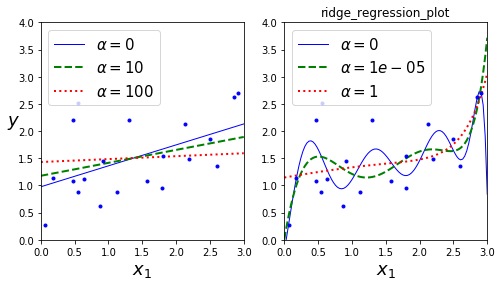

In [8]:
#Plot the Ridge with different hyperparameter
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.title("ridge_regression_plot")
plt.show()

### Rdige Regression --- Normal Equation

In [3]:
from sklearn.linear_model import Ridge

In [4]:
ridge_reg = Ridge(alpha= 1, solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.15]])

array([[1.42373335]])

### Using SGD  with penalty l2 == ridge

In [6]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)

sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.49905184])

The penalty hyperparameter sets the type of regularization term to use. Specifying
"l2" indicates that you want SGD to add a regularization term to the cost function
equal to half the square of the ℓ2
 norm of the weight vector: this is simply Ridge
Regression.

## Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm
of the weight vector instead of half the square of the ℓ2
 norm 

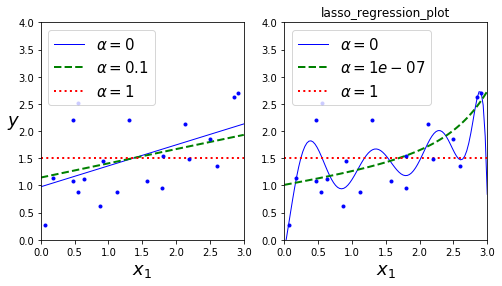

In [10]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

plt.title("lasso_regression_plot")
plt.show()

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero). For example,
the dashed line in the right plot on above figure (with α = 10-7) looks quadratic, almost
linear: all the weights for the high-degree polynomial features are equal to zero. In
other words, Lasso Regression automatically performs feature selection and outputs a
sparse model (i.e., with few nonzero feature weights).

In [12]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.15]])


array([1.4462965])

### SGD with penalty l1 == Lasso

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)

sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.49905184])

### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression

In [18]:
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_reg.fit(X,y)
elastic_reg.predict([[1.15]])

array([1.43671315])

## Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum. This is
called early stopping

Figure below shows a complex model (in this case a high-degree
Polynomial Regression model) being trained using Batch Gradient Descent. As the
epochs go by, the algorithm learns and its prediction error (RMSE) on the training set
naturally goes down, and so does its prediction error on the validation set. However,
after a while the validation error stops decreasing and actually starts to go back up.
This indicates that the model has started to overfit the training data. With early stop‐
ping you just stop training as soon as the validation error reaches the minimum. It is
such a simple and efficient regularization technique that Geoffrey Hinton called it a
“beautiful free lunch.”

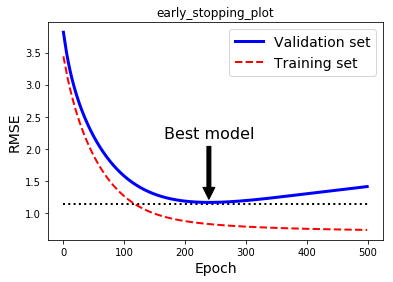

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#Generating a Random data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("early_stopping_plot")
plt.show()

With Stochastic and Mini-batch Gradient Descent, the curves are
not so smooth, and it may be hard to know whether you have
reached the minimum or not. One solution is to stop only after the
validation error has been above the minimum for some time (when
you are confident that the model will not do any better), then roll
back the model parameters to the point where the validation error
was at a minimum.

In [25]:
from sklearn.base import clone

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [26]:
best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))